# Logistic Regresion With GD (Gradient Descent)
hasil yang didapatkan dengan iterasi 50000 dan Learning Rate sebesar 0.5

w : [-22.86225049, -32.07887625]

bias : 29.722984605583232

# Import Library dan Data yang dibutuh

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from math import exp
import seaborn as sns
from sklearn.linear_model import LogisticRegression


In [2]:
X_train = np.array([[0.08, 0.72], [0.26, 0.58], [0.45, 0.15], [0.60, 0.30], [0.10, 1.0], [0.35, 0.95], [0.70, 0.65], [0.92, 0.45]])

y_train = np.array([1, 1, 1, 1, 0, 0, 0, 0])

X_test = np.array([[0.10, 0.9], [0.4, 0.2], [0.8, 0.5], [0.2, 0.6]])


In [3]:
dfComplete = dfX_Train = pd.DataFrame(X_train, columns=['x', 'y'])
dfComplete['Class'] = pd.DataFrame(y_train)
dfComplete


,x,y,Class
0,0.08,0.72,1
1,0.26,0.58,1
2,0.45,0.15,1
3,0.60,0.30,1
4,0.10,1.00,0
5,0.35,0.95,0
6,0.70,0.65,0
7,0.92,0.45,0


In [21]:
type(y_train)

numpy.ndarray

# Visualisasi data menggunakan Scatter

<AxesSubplot:>

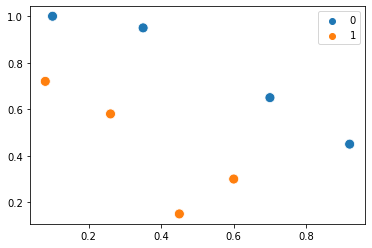

In [4]:
sns.scatterplot(x=X_train[:, 0], y=X_train[:, 1], hue=y_train, s=100)

# Membuat class untuk kebutuhan Logistic Regression dengan menggunakan Gradient Desent

In [5]:
class LogisticRegressionManual():
    def __init__(self, Iteration, LearningRate):
        self.LearningRate = LearningRate
        self.iteration = Iteration

    def fittingData(self, X, y):
        self.col, self.row = X.shape
        self.m = np.zeros(self.row)
        self.b = 0
        self.X = X
        self.Y = y
        loss = []

        for _ in range(self.iteration) :
            A = 1/(1 + np.exp(-(np.dot(self.X, self.m) + self.b)))
            # print(A)
            Temp = (A - self.Y.T)
            Temp = np.reshape(Temp, self.col)
            Newb = np.sum(Temp)/self.col
            Newm = np.dot(self.X.T, Temp)/ self.col
            self.b -= Newb*self.LearningRate
            self.m -= Newm*self.LearningRate
            LossData = -1 * sum(y*np.log(A) + (1-y)*np.log(1-A))
            loss.append(LossData)

        return loss


# Fungsi untuk melakukan prediksi data berdasarkan m dan Bias yang diberikan

In [6]:
def PredictResult(X, m, b):
    Z = 1 / (1 + np.exp(- (X.dot(m) + b)))
    Y = np.where(Z > 0.5, 1, 0)
    return Z, Y


#Pemanggilan Model dan mencari m dan bias yang didapatkan dengan menggunakan 50000 iterasi dengan learning rate 0.5

In [7]:
ModelManual = LogisticRegressionManual(50000, 0.5)
loss = ModelManual.fittingData(X_train, y_train)
print(ModelManual.m, ModelManual.b)


[-22.86225049 -32.07887625] 29.722984605583232


# Visualisasi hasil loss dari iterasi diatas

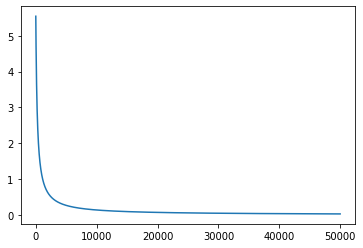

In [8]:
plt.plot(np.arange(ModelManual.iteration), loss[0:])

#Hasil Prediksi yang didapatkan berdasarkan m dan bias untuk data training

In [9]:
y_raw, y_treshold = PredictResult(X_train, ModelManual.m, ModelManual.b)
DFX_train = pd.DataFrame({'raw' : y_raw, 'Treshold' : y_treshold})
DFX_train

,raw,Treshold
0,0.991815,1
1,0.994365,1
2,1.000000,1
3,0.998311,1
4,0.009545,0
5,0.000158,0
6,0.000799,0
7,0.003186,0


# Hasil training dan prediksi memiliki akurasi 100%, yang berarti w dan bias dapat menentukan class dari data training dengan baik

In [10]:
count = 0
correct = 0
for count in range(np.size(y_treshold)):
    if(y_treshold[count] == y_train[count]):
        correct+=1
    count+=1
print("Accuracy : ", correct/count *100, "%")


Accuracy :  100.0 %


# kita melakukan prediksi dari data testing yang diberikan pada X_test, dan menghasilkan [0, 1, 0, 1]

In [11]:
y_rawtest, y_tresholdtest = PredictResult(X_test, ModelManual.m, ModelManual.b)
DFX_test = pd.DataFrame({'raw': y_rawtest, 'Treshold': y_tresholdtest})
DFX_test


,raw,Treshold
0,0.192441,0
1,0.999999,1
2,0.009890,0
3,0.997277,1


#Manipulasi data untuk visualisasi data

In [12]:
y_all = []
for data in y_train:
    y_all.append(data)
for data in y_tresholdtest:
    y_all.append(data)
arrayY_all = np.array(y_all)
arrayY_all


array([1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1])

In [13]:
dfX_test = pd.DataFrame(X_test, columns=['x','y'])
dfX_test['Class'] = pd.DataFrame(y_tresholdtest)
dfX_all = pd.concat([dfComplete, dfX_test])
dfX_all


,x,y,Class
0,0.08,0.72,1
1,0.26,0.58,1
2,0.45,0.15,1
3,0.60,0.30,1
4,0.10,1.00,0
5,0.35,0.95,0
6,0.70,0.65,0
7,0.92,0.45,0
0,0.10,0.90,0
1,0.40,0.20,1


In [14]:
dftrain = pd.DataFrame(X_train, columns=['x','y'])
dftest = pd.DataFrame(X_test, columns=['x','y'])
dfall = pd.concat([dftrain, dftest])
arrayX_all = dfall.to_numpy()

# Boundary Decision yang didapatkan berdasarkan m dan bias untuk data training

In [15]:
def BoundaryDecisionLine(X) :
 return (-1 * ModelManual.b / ModelManual.m[1]) + ((-1 * ModelManual.m[0]/ModelManual.m[1]) * X[:, 0])

<AxesSubplot:>

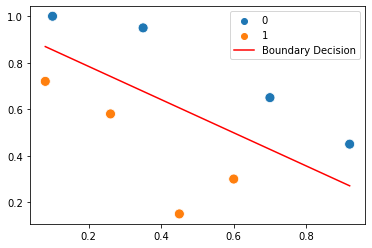

In [16]:
Line1 = BoundaryDecisionLine(X_train)

sns.scatterplot(x=X_train[:, 0], y=X_train[:, 1], hue=y_train, s=100)
sns.lineplot(x=X_train[:, 0], y=Line1, label='Boundary Decision', color='red')

# Boundary Decision yang didapatkan berdasarkan m dan bias untuk data Testing

<AxesSubplot:>

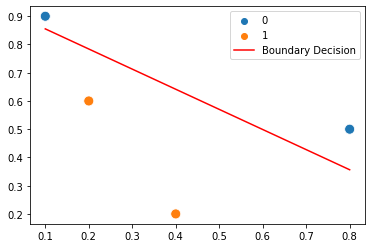

In [17]:
Line2 = BoundaryDecisionLine(X_test)

sns.scatterplot(x=X_test[:, 0], y=X_test[:, 1], hue=y_tresholdtest, s=100)
sns.lineplot(x=X_test[:, 0], y=Line2, label='Boundary Decision', color='red')


# Boundary Decision yang didapatkan berdasarkan m dan bias untuk data gabungan training dan testing

<AxesSubplot:>

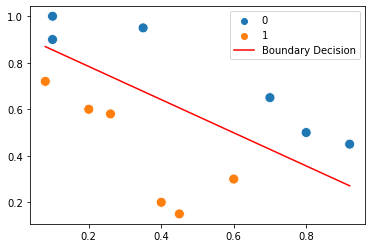

In [18]:
Line3 = BoundaryDecisionLine(arrayX_all)

sns.scatterplot(x=arrayX_all[:, 0], y=arrayX_all[:, 1], hue=arrayY_all, s=100)
sns.lineplot(x=arrayX_all[:, 0], y=Line3, label='Boundary Decision', color='red')